# Project: Visualization of Perceptron Logic Gates

In this project, I will use perceptrons to model the fundamental building blocks of computers — logic gates. Specifically, I will show how a perceptron can be used as a *linear classifier* by visualizing the *decision boundary* of particular set of data. In this case, I will show how:
* AND, OR logic gates can represent linearly seperable data
* a XOR logic gate can represent data that is not linearly seperable

<img src="{{ site.url }}{{ site.baseurl }}/images/perceptron/logicgate.png" alt="logic gates">


## Imports

In this project, we will use the following libraries and settings:

In [1]:
from sklearn.linear_model import Perceptron
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

## Create Data Points

First, let's look at the `A` and `B` columns of our truth table. We can think of each column as a single input, and we can combine these two inputs to create a set of four points.

In [2]:
#list of four possible inputs to gate
data = [[0,0], [0,1], [1,0], [1,1]]

## Create Labels

We will find the labels for our AND, OR, and XOR logic gates under its corresponding `X` column. Let's create a list of labels for each gate.

In [3]:
#AND, OR, and XOR gate labels
ANDlabels = [0, 0, 0, 1]
ORlabels = [0, 1, 1, 1]
XORlabels = [0, 1, 1, 0]

## Data Visualization Pt. 1: Labeled Scatterplots

Before can create a scatterplot, we need to break down our `data` into its x and y values. We can do this with a list comprehension. Then, we can plot our `x_values` and `y_values` on three different scatterplots, colorizing differences between the three gates.

In [4]:
#generate x and y values from data
x_values = [point[0] for point in data]
y_values = [point[1] for point in data]

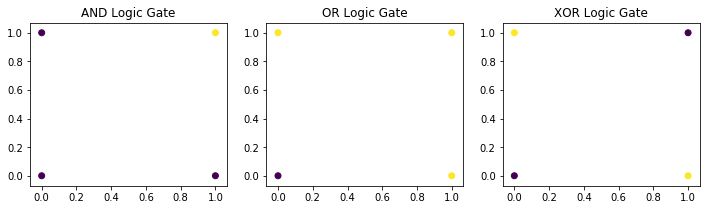

In [5]:
#plot AND gate
fig = plt.figure(figsize = (12,3))
plt.subplot(1,3,1)
plt.scatter(x_values, y_values, c=ANDlabels)
plt.title("AND Logic Gate")

#plot OR gate
plt.subplot(1,3,2)
plt.scatter(x_values, y_values, c=ORlabels)
plt.title("OR Logic Gate")

#plot XOR gate
plt.subplot(1,3,3)
plt.scatter(x_values, y_values, c=XORlabels)
plt.title("XOR Logic Gate")
plt.show()

In the context of our logic gate problem, "linearly separable" means that a straight line, formally known as `decision boundary`, could be drawn somewhere on our scatterplot that would entirely separate the colored dots. 

Take a look at the illustration below. Using the eyeball test, we can guess that our decision boundary is somewhere close to the drawn red lines.

A line can be drawn on the AND, OR graphs indicating that these logic gates are linearly separable. This line cannot be drawn on the XOR graph, indicating that the XOR logic gate is not linearly separable. 

<img src="{{ site.url }}{{ site.baseurl }}/images/perceptron/3_logic_gates_edit.png" alt="3 logic gates">

## Create the Perceptron Model

Using our data and labels, let's build a perceptron to learn AND, OR, and XOR.

In [6]:
#create perceptron object
classifier = Perceptron(max_iter=40, tol=1e-3)

## Train and Evaluate Model

Normally, we wouldn't train and test our model on the same dataset. However, in our scenario there are only four possible inputs to each gate, so we're stuck training on every possible input and testing on those same points.

We can use the `.score()` method to print the accuracy of the model on the data points. 

In [7]:
#train model, and print accuracy of model on the data points
classifier.fit(data, ANDlabels)
print(classifier.score(data, ANDlabels))
#output of 1.0 indicates that 100% of the time, model was able to correctly determine output given data

classifier.fit(data, ORlabels)
print(classifier.score(data, ORlabels))
#output of 1.0 indicates that 100% of the time, model was able to correctly determine output given data

classifier.fit(data, XORlabels)
print(classifier.score(data, XORlabels))
#output of 0.5 indicates that 50% of the time, model was able to correctly determine output given data

1.0
1.0
0.5


The AND & OR logic gates both had an output score of `1.0` which indicates that 100% of the time the model was able to correctly determine output given data. Thus, these two gates are linearly seperable; in other words, a decision boundary exists.

The XOR logic gates had an output score of `0.5` which indicates that only 50% of the time the model was able to correctly determine output given data. Thus, XOR is not linearly seperable; in other words, a decision boundary does not exist.

## Data Visualization Pt. 2: Decision Boundary Heatmaps

We can use the `.decision_function` method to calculate the distance between a particular point and the decision boundary of a dataset. For example:

In [8]:
#decision fucntion can tell us the proximity of a particular point from the decision boundary
#example:
print(classifier.decision_function([[0, 0], [1, 1], [0.5, 0.5]]))
#output of [ 0.  -1.  -0.5] tells us that points [0, 0], [1, 1], [0.5, 0.5] are 0, -1.0, and-0.5 units away from XOR decision boundary

[ 0.  -1.  -0.5]


In this example, `decision_function` tells us that points `[0, 0], [1, 1], [0.5, 0.5]` are `0, -1.0, and -0.5` units away from XOR decision boundary.

Let's use the capability of the `decision_fucntion` to create a heatmap for each logic gate. Each heatmap will contain 100 equidistant, ordered pairs and their respective distances from the decision boundary.

In [9]:
#use decision_function method to create a heatmap containing 100 equidistant, ordered pairs and their respective distances from the decision boundary
x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)
point_grid = list(product(x_values, y_values))

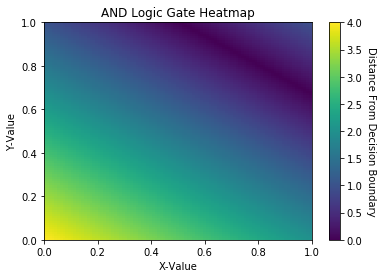

In [10]:
#plot heatmap for AND gate
classifier.fit(data, ANDlabels)
distances = classifier.decision_function(point_grid)
abs_distances = [abs(pt) for pt in distances]
distances_matrix = np.reshape(abs_distances, (100,100))

heatmap = plt.pcolormesh(x_values, y_values, distances_matrix)
cbar = plt.colorbar(heatmap)
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
plt.title("AND Logic Gate Heatmap")
cbar.set_label("Distance From Decision Boundary", rotation=270, labelpad=13)
plt.show()

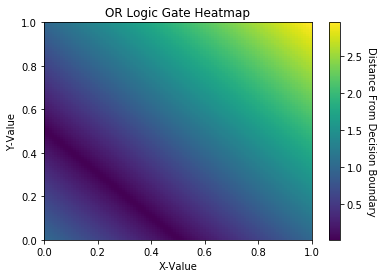

In [11]:
#plot heatmap for OR gate
classifier.fit(data, ORlabels)
distances = classifier.decision_function(point_grid)
abs_distances = [abs(pt) for pt in distances]
distances_matrix = np.reshape(abs_distances, (100,100))

heatmap = plt.pcolormesh(x_values, y_values, distances_matrix)
cbar = plt.colorbar(heatmap)
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
plt.title("OR Logic Gate Heatmap")
cbar.set_label("Distance From Decision Boundary", rotation=270,labelpad=13)
plt.show()

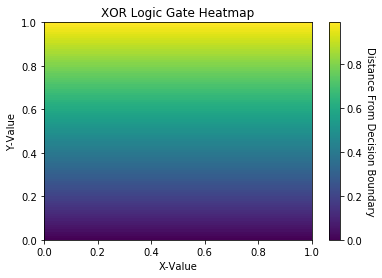

In [12]:
#plot heatmap for XOR gate
classifier.fit(data, XORlabels)
distances = classifier.decision_function(point_grid)
abs_distances = [abs(pt) for pt in distances]
distances_matrix = np.reshape(abs_distances, (100,100))

heatmap = plt.pcolormesh(x_values, y_values, distances_matrix)
cbar = plt.colorbar(heatmap)
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
plt.title("XOR Logic Gate Heatmap")
cbar.set_label("Distance From Decision Boundary", rotation=270, labelpad=13)
plt.show()

## Analysis

The deep purple region of the AND & OR logic gate heatmap represents its respective decision boundary.

In the XOR heatmap, the deep purple region is unable to seperate data into 2 distinct regions. Thus, the XOR heatmap illustrates data that is not linearly seperable.

## Conclusion

A single perceptron with only two inputs can only solve problems that are linearly seperable because it cannot represent a non-linear decision boundary.

However, by increasing the number of features and perceptrons, we can give rise to the Multilayer Perceptrons, also known as Neural Networks, which can solve much more complicated problems. More on Neural Networks in future posts! :-)